Neste projeto iremos trabalhar com um dataset de seguro medico. Este dataset se refere a uma modificacao do [Medical Insurance Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download).

__Variaveis:__
- Age: idade do segurado
- Gender: Genero do segurado. 1 = Mulher; 2 = Homem
- BMI: Indice de massa corporal
- No_of_Children: Numero de filhos que o segurado possui
- Smoker: Se o segurado eh fumante ou nao. 1 = Fumante; 0 = Nao fumante.
- Region: A qual regiao dos Estados Unidos da America o segurado pertence. 1 = Northwest; 2 = Northeast; 3 = Southwest; 4 = Southeast
- Charges: Cobrancas do seguro em US dolares.

__Objetivos:__
- Carregas os dados
- Limpar os dados, tratando os dados ausentes
- Realizar uma Analise Exploratoria de Dados e identificar os atributos que mais afetam as cobrancas de seguro
- Desenvolver um Regressao Linear simples e multipla para prever as cobrancas
- Usar a Regressao Ridge para melhorar a performance dos modelos de regressao.

# Importacoes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Carregar os dados

In [2]:
df = pd.read_csv("medical_insurance_dataset.csv")
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


## Breves alteracoes

In [3]:
# Alterar o nome das variaveis
columns = ['Age', 'Gender', 'BMI', 'No_of_Children', 'Smoker', 'Region', 'Charges']
df.columns = columns

In [4]:
df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [5]:
# Substituir os valores "?" por NaN.
df.replace('?', np.nan, inplace=True)

In [6]:
df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


# Exploracao dos dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Observamos que o nosso dataset possui 2771 entradas. Ou seja, as variaveis "Age" e "Smoker" possuem valores ausentes, e tambem estao com seu tipo de dado "object". 

Eh solicitado que sejam feitos os seguintes tratamentos:
- Para as variaveis continuas, substituir os valores ausentes com a media.
- Para as variaveis categoricas, substituir os valores ausentes com a moda.
- Atualizar o tipo de dado das colunas.
- Validar as alteracoes.

In [8]:
# Substituir as idades ausentes com a media
mean_age = df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.nan, mean_age, inplace=True)

# Substituir os valores ausentes da variavel Smoker com a moda.
smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan, smoker, inplace=True)

# Alterar o tipo de dado das variaveis
df[['Age', 'Smoker']] = df[['Age', 'Smoker']].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


In [9]:
# Alterar a coluna "Charges" para ter apenas duas casas decimais.
df['Charges'] = df['Charges'].round(2)

In [10]:
df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


__Grafico da Regressao Linear__ para as variaveis _Charges_ e _BMI_

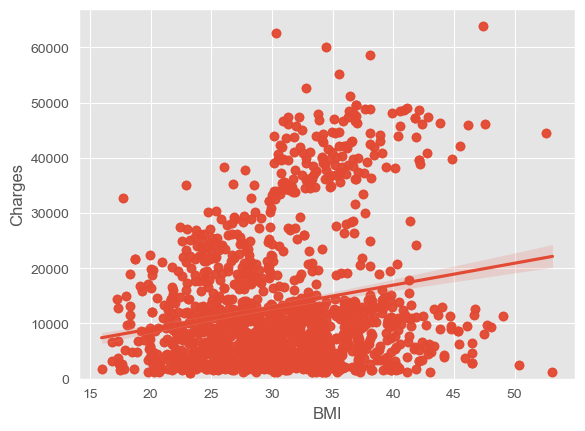

In [11]:
sns.regplot(x="BMI", y="Charges", data=df)
plt.ylim(0,)
plt.show();

__Grafico de Caixa__ para as variaveis _Charges_ e _Smoker_

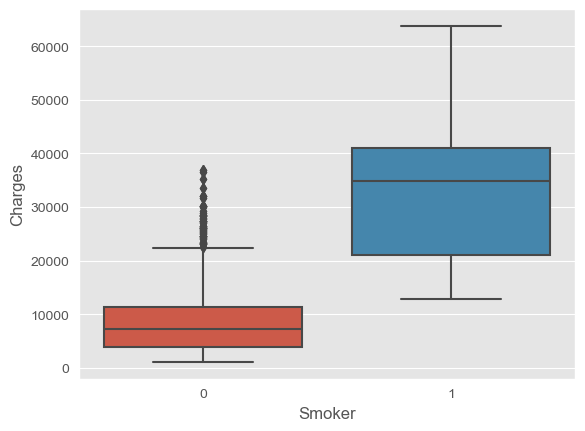

In [12]:
sns.boxplot(x="Smoker", y="Charges", data=df)
plt.show();

In [13]:
# Exibir a correlacao
df.corr()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_Children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Desenvolvimento do modelo

In [14]:
lr = LinearRegression()
x = df[['Smoker']]
y = df[['Charges']]
lr.fit(x, y)
lr.score(x, y)

0.6227430402464125

In [15]:
y = df['Charges']
x = df.drop("Charges", axis=1)
lr.fit(x, y)
lr.score(x, y)

0.7505888664568174

In [17]:
Input = [("Scale", StandardScaler()), ("PolynomialFeatures", PolynomialFeatures(include_bias=False)), ("Model", LinearRegression())]
pipe = Pipeline(Input)
z = x.astype(float)
pipe.fit(z, y)
ypipe = pipe.predict(z)
print(r2_score(y, ypipe))

0.8453679236827971


# Refinamento do modelo

In [18]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

In [19]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
yhat = ridge.predict(x_test)
print(r2_score(y_test, yhat))

0.725419885841223


In [20]:
pl = PolynomialFeatures(degree=2)
x_train_pr = pl.fit_transform(x_train)
x_test_pr = pl.fit_transform(x_test)
ridge.fit(x_train_pr, y_train)
yhat = ridge.predict(x_test_pr)
print(r2_score(y_test, yhat))

0.820841319517228
